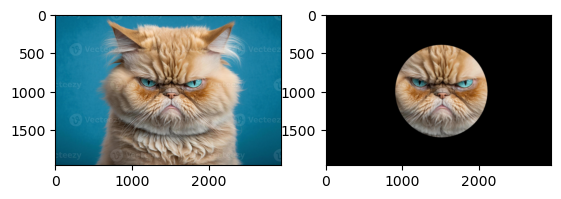

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoque_sector(img,centro,x,y):
    img=np.copy(img)

    valx, valy=centro

    mediox=x//2
    medioy=y//2

    mascara=np.zeros_like(img,dtype=np.uint8)
    cv2.ellipse(mascara,(valx,valy),(mediox,medioy),0,0,360,(255,255,255),-1)

    img_mascara=cv2.bitwise_and(img,mascara)
    desenfoque=cv2.GaussianBlur(img_mascara,(15,15),0)
    
    return desenfoque

Image=cv2.imread('cat.jpg')
Image=cv2.cvtColor(Image,cv2.COLOR_BGR2RGB)

img_fin=desenfoque_sector(Image,(1500,1000),1200,1200)

plt.subplot(121)
plt.imshow(Image)

plt.subplot(122)
plt.imshow(img_fin)

plt.show()

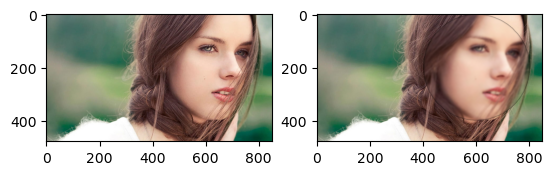

In [29]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoque_sector(img,centro,x,y):
    img=np.copy(img)

    valx, valy=centro

    mediox=x//2
    medioy=y//2

    mascara=np.zeros_like(img,dtype=np.uint8)
    cv2.ellipse(mascara,(valx,valy),(mediox,medioy),0,0,360,(255,255,255),-1)

    img_mascara=cv2.bitwise_and(img,mascara)
    desenfoque=cv2.GaussianBlur(img_mascara,(15,15),0)

    img[mascara!=0]=desenfoque[mascara!=0]
    
    return img

Image=cv2.imread('girl.jpg')
Image=cv2.cvtColor(Image,cv2.COLOR_BGR2RGB)

img_fin=desenfoque_sector(Image,(600,200),400,400)

plt.subplot(121)
plt.imshow(Image)

plt.subplot(122)
plt.imshow(img_fin)

plt.show()

practica 23_04_24

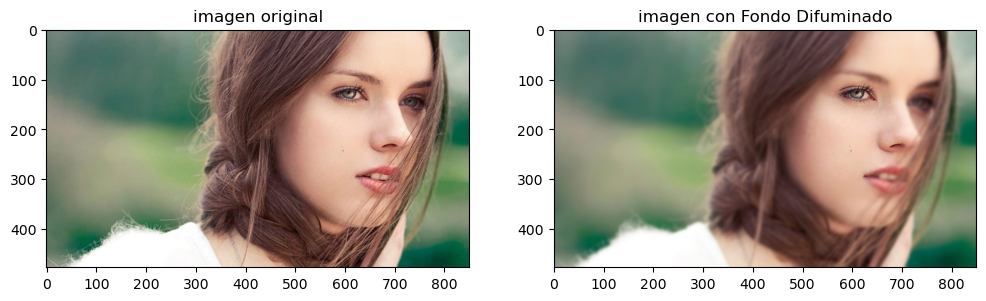

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def difuminar_fondo(img, centro, x, y):
    img_copy = np.copy(img)

    valx, valy = centro
    mediox = x // 2
    medioy = y // 2

    mascara = np.zeros_like(img_copy, dtype=np.uint8)
    cv2.ellipse(mascara, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)

    img_difuminada = cv2.GaussianBlur(img_copy, (15, 15), 0)

    img_final = np.copy(img_difuminada)
    img_final[mascara != 0] = img_copy[mascara != 0]

    return img_final

imagen = cv2.imread('girl.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


imagen_final = difuminar_fondo(imagen_rgb, (600, 200), 200, 200)


plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(imagen_rgb)
plt.title('imagen original')

plt.subplot(122)
plt.imshow(imagen_final)
plt.title('imagen con Fondo Difuminado')

plt.show()


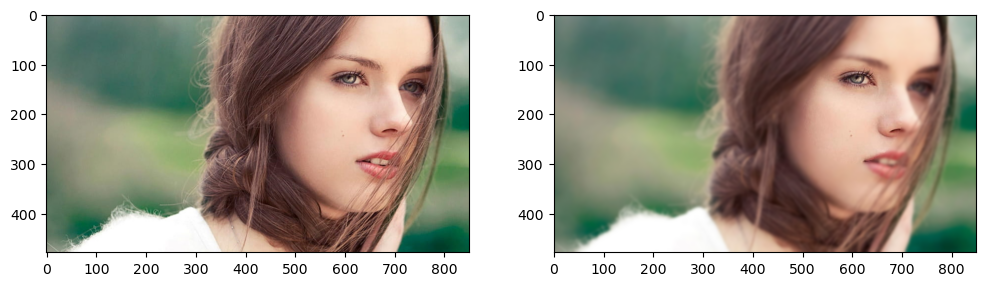

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def desenfoque_inverso(img, centro, x, y):
    img = np.copy(img)

    valx, valy = centro
    mediox = x // 2
    medioy = y // 2

    # Crear una máscara para el área fuera de la elipse (área difuminada)
    mascara_difuminada = np.zeros_like(img, dtype=np.uint8)
    cv2.ellipse(mascara_difuminada, (valx, valy), (mediox, medioy), 0, 0, 360, (255, 255, 255), -1)

    # Aplicar desenfoque a toda la imagen
    img_difuminada = cv2.GaussianBlur(img, (15, 15), 0)

    # Reemplazar el área difuminada en la imagen difuminada con el área original de la imagen
    img_final = np.copy(img_difuminada)
    img_final[mascara_difuminada != 0] = img[mascara_difuminada != 0]

    return img_final

# Cargar y convertir la imagen
image = cv2.imread('girl.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Aplicar la función de desenfoque inverso a una región específica
img_final = desenfoque_inverso(image_rgb, (600, 200), 200, 200)

# Mostrar la imagen original y la imagen con el efecto aplicado
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image_rgb)

plt.subplot(122)
plt.imshow(img_final)

plt.show()
